In [1]:
import glob
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# 폴더 경로 지정
folder_path = r'C:\Users\pc\Desktop\CNN\CIC-AndMal2017'

In [2]:
benign_folder_path = r'C:\Users\pc\Desktop\CNN\CIC-AndMal2017\Benign'

# 'Benign' 클래스의 파일 경로 리스트 받아오기
benign_file_paths = glob.glob(benign_folder_path + '/*.csv')

# 'Benign' 클래스의 데이터프레임 초기화
benign_data = pd.DataFrame()

# 'Benign' 클래스의 모든 파일 로드
for file_path in benign_file_paths:
    data = pd.read_csv(file_path)
    benign_data = pd.concat([benign_data, data], ignore_index=True)

# 'Benign' 클래스에서 160,000개 무작위 샘플 추출
num_samples_benign = 160000
labels = []

if len(benign_data) > num_samples_benign:
    train_benign_subset = benign_data.sample(n=num_samples_benign, random_state=42)
else:
    train_benign_subset = benign_data.copy()

# Benign 데이터의 라벨을 labels 리스트에 추가
labels.extend(train_benign_subset[' Label'].tolist())

print("train_benign_subset의 샘플 개수:", len(train_benign_subset))

train_benign_subset의 샘플 개수: 160000


In [3]:
ransomware_folder_list = glob.glob(folder_path + '\\Ransomware\\*')
all_ransomware_data = pd.DataFrame()

for ransomware_folder_path in ransomware_folder_list:
    ransomware_file_paths = glob.glob(ransomware_folder_path + '/*.csv')
    
    # 각 랜섬웨어 클래스의 모든 파일 로드
    for file_path in ransomware_file_paths:
        data = pd.read_csv(file_path)
        all_ransomware_data = pd.concat([all_ransomware_data, data], ignore_index=True)

# 전체 랜섬웨어 데이터에서 160,000개 샘플 무작위로 추출
if len(all_ransomware_data) > 160000:
    train_ransomware_subset = all_ransomware_data.sample(n=160000, random_state=42, replace=False)
else:
    train_ransomware_subset = all_ransomware_data.copy()

# 랜섬웨어 데이터의 라벨을 labels 리스트에 추가
labels.extend(train_ransomware_subset[' Label'].tolist())

print("train_ransomware_subset의 샘플 개수:", len(train_ransomware_subset))

train_ransomware_subset의 샘플 개수: 160000


In [4]:
# 'Benign' 클래스와 랜섬웨어 클래스의 데이터프레임들을 합치기
train_dataset = pd.concat([train_benign_subset, train_ransomware_subset], ignore_index=True)

print("최종 train 데이터세트의 샘플 개수:", len(train_dataset))

최종 train 데이터세트의 샘플 개수: 320000


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# IP 주소를 수치형 데이터로 변환하는 함수
def ip_to_numeric(ip):
    if not isinstance(ip, str):
        return np.nan
    return sum(int(octet) * 256 ** (3 - index) for index, octet in enumerate(ip.split('.')))

# Apply the ip_to_numeric function to the 'Destination IP' column
train_dataset['Destination IP'] = train_dataset[' Destination IP'].apply(ip_to_numeric)

# 상관분석으로 선택된 특성들만 사용
selected_features = [
    ' ACK Flag Count',
    ' Active Max',
    ' Active Min',
    ' Active Std',
    ' Average Packet Size',
    ' Avg Bwd Segment Size',
    ' Avg Fwd Segment Size',
    ' Bwd Header Length',
    ' Bwd IAT Max',
    ' Bwd IAT Mean',
    ' Bwd Packet Length Mean',
    ' Bwd Packet Length Std',
    ' Bwd Packets/s',
    ' Flow Duration',
    ' Flow Packets/s',
    ' Fwd Header Length',
    ' Fwd IAT Mean',
    ' Fwd Packet Length Max',
    ' Fwd Packet Length Mean',
    ' Fwd Packet Length Std',
    ' Idle Max',
    ' Idle Min',
    ' Idle Std',
    ' Max Packet Length',
    ' Min Packet Length',
    ' PSH Flag Count',
    ' Packet Length Mean',
    ' Packet Length Std',
    ' Packet Length Variance',
    ' Protocol',
    ' SYN Flag Count',
    ' Subflow Bwd Bytes',
    ' Subflow Bwd Packets',
    ' Subflow Fwd Bytes',
    ' Total Backward Packets',
    ' Total Fwd Packets',
    ' Total Length of Bwd Packets',
    ' URG Flag Count',
    ' act_data_pkt_fwd',
    ' min_seg_size_forward',
    'Active Mean',
    'Bwd IAT Total',
    'Bwd Packet Length Max',
    'Destination IP',
    'Flow Bytes/s',
    'Fwd IAT Total',
    'Fwd PSH Flags',
    'Fwd Packets/s',
    'Idle Mean',
    'Init_Win_bytes_forward',
    'Subflow Fwd Packets',
    'Total Length of Fwd Packets'
]

# 선택된 특성만 포함하는 데이터프레임 생성
X_selected = train_dataset[selected_features]

# 데이터 스케일링
scaler = MinMaxScaler()
scaler.fit(train_dataset[selected_features])  # 스케일러 학습
X_scaled = scaler.transform(train_dataset[selected_features])  # 훈련 데이터에 스케일러 적용

# 정규화된 특성들을 데이터프레임으로 변환
X_normalized = pd.DataFrame(X_scaled, columns=selected_features)

# 타깃 변수 데이터로 변환
y = np.array(labels)

# 결과 출력
print("정규화된 선택된 특성들의 데이터프레임:")
print(X_normalized.head())

정규화된 선택된 특성들의 데이터프레임:
    ACK Flag Count   Active Max   Active Min   Active Std  \
0              0.0     0.000000     0.000000          0.0   
1              1.0     0.000000     0.000000          0.0   
2              0.0     0.001415     0.001415          0.0   
3              0.0     0.000000     0.000000          0.0   
4              1.0     0.000000     0.000000          0.0   

    Average Packet Size   Avg Bwd Segment Size   Avg Fwd Segment Size  \
0              0.050957               0.070548               0.013209   
1              0.000000               0.000000               0.000000   
2              0.042511               0.025616               0.038476   
3              0.120576               0.089212               0.110414   
4              0.019426               0.000000               0.007790   

    Bwd Header Length   Bwd IAT Max   Bwd IAT Mean  ...  \
0            0.999152      0.000000       0.000000  ...   
1            0.999152      0.000000       0.000000  ..

In [8]:
X_padded = np.pad(X_normalized.values, ((0, 0), (0, 12)), mode='constant', constant_values=0)

# 선택된 특성을 8x8 크기의 2차원 행렬로 변환
num_rows = 8
num_columns = 8
X_reshaped = X_padded.reshape(-1, num_rows, num_columns)

# 결과 출력
print("8x8 크기의 2차원 행렬:")
for i in range(num_rows):
    print(X_reshaped[0][i])  # 첫 번째 샘플에 해당하는 2x3 행렬 출력

8x8 크기의 2차원 행렬:
[0.         0.         0.         0.         0.05095721 0.07054795
 0.01320908 0.99915187]
[0.00000000e+00 0.00000000e+00 7.05479452e-02 0.00000000e+00
 1.04913080e-05 7.94301774e-04 1.04829678e-05 9.93128604e-01]
[0.         0.00192384 0.01320908 0.         0.         0.
 0.         0.0050809 ]
[3.29391892e-02 0.00000000e+00 4.29520645e-02 1.40823008e-02
 1.98311196e-04 1.00000000e+00 0.00000000e+00 4.79270392e-06]
[6.70690812e-05 4.00783933e-06 6.70690812e-05 0.00000000e+00
 4.79270392e-06 0.00000000e+00 0.00000000e+00 8.91079304e-01]
[0.00000000e+00 0.00000000e+00 7.90362185e-03 3.83092022e-02
 1.12435149e-05 0.00000000e+00 0.00000000e+00 5.24146129e-06]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.00783933e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
from PIL import Image
import os

# 이미지를 저장할 폴더를 생성합니다.
save_folder = r'C:\Users\pc\Desktop\CNN\Correlation\0.1_threshold\Train_Image\\'
os.makedirs(os.path.join(save_folder, "Benign"), exist_ok=True)
os.makedirs(os.path.join(save_folder, "Ransomware"), exist_ok=True)

# 이미지 확대 비율 설정
resize_factor = 10  # 10배 확대

# X_final_reshaped를 이미지로 변환하여 저장합니다.
num_samples = X_reshaped.shape[0]
for i in range(num_samples):
    # 1채널 16비트 PNG 이미지 생성
    image_data = X_reshaped[i]
    image_data = (image_data * 65535).astype('uint16')  # 16비트로 변환
    image = Image.fromarray(image_data, 'I;16')  # 16비트 단일 채널 이미지로 변환

    # 이미지 데이터 확대
    image_data = np.repeat(image_data, resize_factor, axis=0)  # 행 확대
    image_data = np.repeat(image_data, resize_factor, axis=1)  # 열 확대
    
    # 확대된 데이터를 다시 이미지로 변환
    image = Image.fromarray(image_data, 'I;16')  # 16비트 단일 채널 이미지로 변환
    
    # 이미지의 라벨에 따라서 저장 위치 및 파일명 설정
    if i < 160000:
        label = "Benign"
    else:
        label = "Ransomware"

    image_filename = f"image_{i}.png"
    image_filepath = os.path.join(save_folder, label, image_filename)

    # 해당 경로에 이미지가 이미 존재하는 경우 건너뛴다.
    if os.path.exists(image_filepath):
        continue

    image.save(image_filepath)

print("이미지 변환 및 저장이 완료되었습니다.")

이미지 변환 및 저장이 완료되었습니다.


In [12]:
import os
import cv2
import numpy as np

# 라벨 목록 및 해당 라벨에 대한 정수 값 지정
label_mapping = {
    "Benign": 0,
    "Ransomware": 1
}

# 이미지 데이터를 저장한 폴더 경로
image_folder = r'C:\Users\pc\Desktop\CNN\Correlation\0.1_threshold\Train_Image\\'
X_data = []
y_labels = []

# 모든 라벨마다 폴더를 순회합니다.
for label_str, label_int in label_mapping.items():
    folder_path = os.path.join(image_folder, label_str)  # 해당 라벨의 폴더 경로
    
    # 해당 폴더 내의 모든 이미지 파일을 순차적으로 처리
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        # 16-bit 이미지 로딩
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        
        if image is None:  # 이미지 로딩 실패
            print(f"Failed to load image at path: {image_path}")
            continue
        
        X_data.append(image)
        y_labels.append(label_int)

X_data = np.array(X_data, dtype=np.uint16)  # uint16 형태로 이미지 데이터 저장
y_labels = np.array(y_labels)

Label 0 has 160000 samples
Label 1 has 160000 samples
Showing images for label: Benign


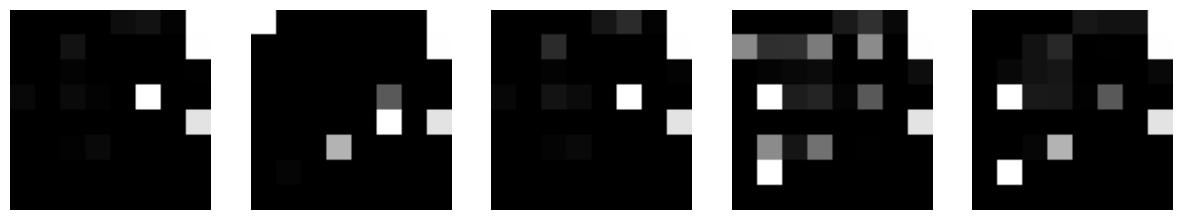

Showing images for label: Ransomware


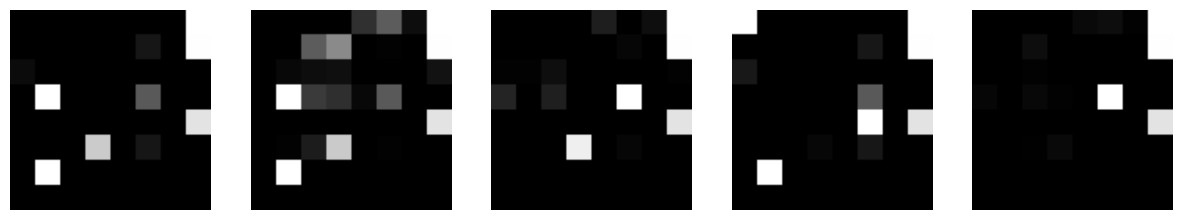

In [13]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# 라벨의 분포를 확인합니다.
label_counts = Counter(y_labels)
for label, count in label_counts.items():
    print(f"Label {label} has {count} samples")

# 라벨별로 이미지 몇 개를 시각화합니다.
num_images_to_show = 5  # 시각화할 이미지의 수를 설정합니다.

for label in label_mapping:
    print(f"Showing images for label: {label}")
    indices = [i for i, l in enumerate(y_labels) if l == label_mapping[label]]
    fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 3))
    for ax, idx in zip(axes, indices[:num_images_to_show]):
        ax.imshow(X_data[idx], cmap='gray')  # 16비트 이미지이므로 cmap='gray'를 사용합니다.
        ax.axis('off')
    plt.show()

In [14]:
# train_benign_subset에 포함되지 않은 데이터 선택
validation_data_candidate = benign_data.drop(train_benign_subset.index)

# 선택된 데이터 중에서 20,000개를 무작위로 선택
num_samples_validation = 20000
if len(validation_data_candidate) > num_samples_validation:
    validation_benign_subset = validation_data_candidate.sample(n=num_samples_validation, random_state=42)
else:
    validation_benign_subset = validation_data_candidate.copy()

print("validation_benign_subset의 샘플 개수:", len(validation_benign_subset))

validation_benign_subset의 샘플 개수: 20000


In [15]:
# train_ransomware_subset에 포함되지 않은 랜섬웨어 데이터 선택
validation_ransomware_candidate = all_ransomware_data.drop(train_ransomware_subset.index)

# 선택된 데이터 중에서 20,000개를 무작위로 선택
num_samples_validation_ransomware = 20000
if len(validation_ransomware_candidate) > num_samples_validation_ransomware:
    validation_ransomware_subset = validation_ransomware_candidate.sample(n=num_samples_validation_ransomware, random_state=42)
else:
    validation_ransomware_subset = validation_ransomware_candidate.copy()

print("validation_ransomware_subset의 샘플 개수:", len(validation_ransomware_subset))

validation_ransomware_subset의 샘플 개수: 20000


In [16]:
# 'Benign' 클래스와 랜섬웨어 클래스의 데이터프레임들을 합치기
validation_dataset = pd.concat([validation_benign_subset, validation_ransomware_subset], ignore_index=True)

print("최종 validation 데이터세트의 샘플 개수:", len(validation_dataset))

최종 validation 데이터세트의 샘플 개수: 40000


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# IP 주소를 수치형 데이터로 변환하는 함수
def ip_to_numeric(ip):
    if not isinstance(ip, str):
        return np.nan
    return sum(int(octet) * 256 ** (3 - index) for index, octet in enumerate(ip.split('.')))

# Apply the ip_to_numeric function to the 'Destination IP' column
validation_dataset['Destination IP'] = validation_dataset[' Destination IP'].apply(ip_to_numeric)

# 상관분석으로 선택된 특성들만 사용
selected_features = [
    ' ACK Flag Count',
    ' Active Max',
    ' Active Min',
    ' Active Std',
    ' Average Packet Size',
    ' Avg Bwd Segment Size',
    ' Avg Fwd Segment Size',
    ' Bwd Header Length',
    ' Bwd IAT Max',
    ' Bwd IAT Mean',
    ' Bwd Packet Length Mean',
    ' Bwd Packet Length Std',
    ' Bwd Packets/s',
    ' Flow Duration',
    ' Flow Packets/s',
    ' Fwd Header Length',
    ' Fwd IAT Mean',
    ' Fwd Packet Length Max',
    ' Fwd Packet Length Mean',
    ' Fwd Packet Length Std',
    ' Idle Max',
    ' Idle Min',
    ' Idle Std',
    ' Max Packet Length',
    ' Min Packet Length',
    ' PSH Flag Count',
    ' Packet Length Mean',
    ' Packet Length Std',
    ' Packet Length Variance',
    ' Protocol',
    ' SYN Flag Count',
    ' Subflow Bwd Bytes',
    ' Subflow Bwd Packets',
    ' Subflow Fwd Bytes',
    ' Total Backward Packets',
    ' Total Fwd Packets',
    ' Total Length of Bwd Packets',
    ' URG Flag Count',
    ' act_data_pkt_fwd',
    ' min_seg_size_forward',
    'Active Mean',
    'Bwd IAT Total',
    'Bwd Packet Length Max',
    'Destination IP',
    'Flow Bytes/s',
    'Fwd IAT Total',
    'Fwd PSH Flags',
    'Fwd Packets/s',
    'Idle Mean',
    'Init_Win_bytes_forward',
    'Subflow Fwd Packets',
    'Total Length of Fwd Packets'
]

# 선택된 특성만 포함하는 데이터프레임 생성
val_X_selected = validation_dataset[selected_features]

# 앞서 훈련 데이터에 대해 학습한 MinMaxScaler 인스턴스를 사용하여 검증 데이터를 변환
val_X_scaled = scaler.transform(val_X_selected)

# 정규화된 특성들을 데이터프레임으로 변환
val_X_normalized = pd.DataFrame(val_X_scaled, columns=selected_features)

# 타깃 변수 데이터로 변환
y = np.array(labels)

# 결과 출력
print("정규화된 선택된 특성들의 데이터프레임:")
print(val_X_normalized.head())

정규화된 선택된 특성들의 데이터프레임:
    ACK Flag Count   Active Max   Active Min   Active Std  \
0              0.0          0.0          0.0          0.0   
1              0.0          0.0          0.0          0.0   
2              1.0          0.0          0.0          0.0   
3              0.0          0.0          0.0          0.0   
4              0.0          0.0          0.0          0.0   

    Average Packet Size   Avg Bwd Segment Size   Avg Fwd Segment Size  \
0              0.240616               0.339937               0.117127   
1              0.000000               0.000000               0.000000   
2              0.000000               0.000000               0.000000   
3              0.096284               0.168493               0.016257   
4              0.000000               0.000000               0.000000   

    Bwd Header Length   Bwd IAT Max   Bwd IAT Mean  ...  \
0            0.999152      0.002952       0.001564  ...   
1            0.999152      0.000000       0.000000  ..

In [18]:
X_val_padded = np.pad(val_X_normalized.values, ((0, 0), (0, 12)), mode='constant', constant_values=0)

# 선택된 특성을 8x8 크기의 2차원 행렬로 변환
num_rows = 8
num_columns = 8
X_val_reshaped = X_val_padded.reshape(-1, num_rows, num_columns)

# 결과 출력
print("8x8 크기의 2차원 행렬:")
for i in range(num_rows):
    print(X_val_reshaped[0][i])  # 첫 번째 샘플에 해당하는 2x3 행렬 출력

8x8 크기의 2차원 행렬:
[0.         0.         0.         0.         0.24061562 0.33993678
 0.11712666 0.99915187]
[2.95166070e-03 1.56433109e-03 3.39936776e-01 5.43821623e-01
 5.77492112e-06 1.87593086e-02 5.32235618e-06 9.93128606e-01]
[0.00187749 0.03413575 0.11712666 0.08024021 0.         0.
 0.         0.06319061]
[0.00000000e+00 1.00000000e+00 2.92055055e-01 1.90308719e-01
 3.62174087e-02 3.52941176e-01 0.00000000e+00 3.00218696e-04]
[8.71898055e-04 3.90918483e-04 8.71898055e-04 1.48500149e-03
 3.00218696e-04 0.00000000e+00 8.91000891e-04 8.91079311e-01]
[0.00000000e+00 1.85300339e-02 9.82965009e-02 4.06737996e-01
 3.43846682e-05 1.87593336e-02 0.00000000e+00 2.43904316e-06]
[0.00000000e+00 1.00000000e+00 1.48500149e-03 3.90918483e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
from PIL import Image
import os

# 이미지를 저장할 폴더를 생성합니다.
save_folder = r'C:\Users\pc\Desktop\CNN\Correlation\0.1_threshold\Validation_Image\\'
os.makedirs(os.path.join(save_folder, "Benign"), exist_ok=True)
os.makedirs(os.path.join(save_folder, "Ransomware"), exist_ok=True)

# 이미지 확대 비율 설정
resize_factor = 10  # 10배 확대

# X_final_reshaped를 이미지로 변환하여 저장합니다.
num_samples = X_val_reshaped.shape[0]
for i in range(num_samples):
    # 1채널 16비트 PNG 이미지 생성
    image_data = X_val_reshaped[i]
    image_data = (image_data * 65535).astype('uint16')  # 16비트로 변환
    image = Image.fromarray(image_data, 'I;16')  # 16비트 단일 채널 이미지로 변환

    # 이미지 데이터 확대
    image_data = np.repeat(image_data, resize_factor, axis=0)  # 행 확대
    image_data = np.repeat(image_data, resize_factor, axis=1)  # 열 확대
    
    # 확대된 데이터를 다시 이미지로 변환
    image = Image.fromarray(image_data, 'I;16')  # 16비트 단일 채널 이미지로 변환
    
    # 이미지의 라벨에 따라서 저장 위치 및 파일명 설정
    if i < 20000:
        label = "Benign"
    else:
        label = "Ransomware"

    image_filename = f"image_{i}.png"
    image_filepath = os.path.join(save_folder, label, image_filename)

    # 해당 경로에 이미지가 이미 존재하는 경우 건너뛴다.
    if os.path.exists(image_filepath):
        continue

    image.save(image_filepath)

print("이미지 변환 및 저장이 완료되었습니다.")

이미지 변환 및 저장이 완료되었습니다.


In [20]:
import os
import cv2
import numpy as np

# 라벨 목록 및 해당 라벨에 대한 정수 값 지정
label_mapping = {
    "Benign": 0,
    "Ransomware": 1
}

# 이미지 데이터를 저장한 폴더 경로
image_folder = r'C:\Users\pc\Desktop\CNN\Correlation\0.1_threshold\Validation_Image\\'  # Modified path to "Validation_Image"

X_val_data = []  # Changed variable name to X_val_data for clarity
y_val_labels = []  # Changed variable name to y_val_labels for clarity

# 모든 라벨마다 폴더를 순회합니다.
for label_str, label_int in label_mapping.items():
    folder_path = os.path.join(image_folder, label_str)  # 해당 라벨의 폴더 경로
    
    # 해당 폴더 내의 모든 이미지 파일을 순차적으로 처리
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        # 16-bit 이미지 로딩
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        
        if image is None:  # 이미지 로딩 실패
            print(f"Failed to load image at path: {image_path}")
            continue
        
        X_val_data.append(image)  # Changed variable name
        y_val_labels.append(label_int)  # Changed variable name

X_val_data = np.array(X_val_data, dtype=np.uint16)  # uint16 형태로 이미지 데이터 저장, changed variable name
y_val_labels = np.array(y_val_labels)  # Changed variable name

Label 0 has 160000 samples
Label 1 has 160000 samples
Showing images for label: Benign


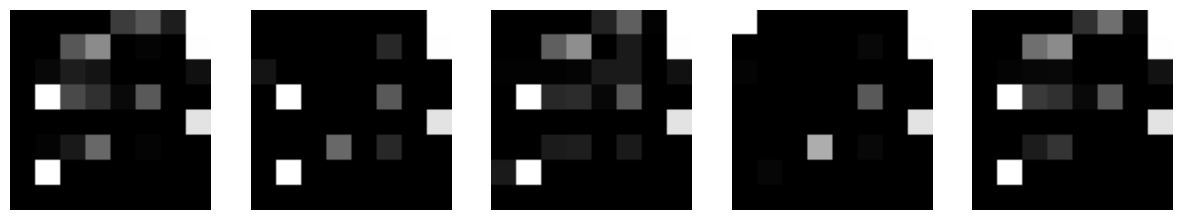

Showing images for label: Ransomware


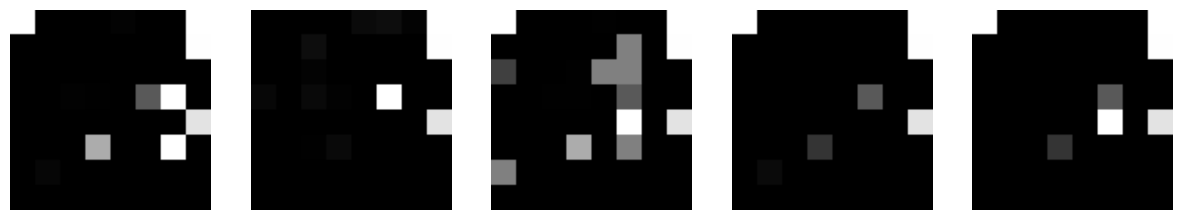

In [21]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# 라벨의 분포를 확인합니다.
label_counts = Counter(y_labels)
for label, count in label_counts.items():
    print(f"Label {label} has {count} samples")

# 라벨별로 이미지 몇 개를 시각화합니다.
num_images_to_show = 5  # 시각화할 이미지의 수를 설정합니다.

for label in label_mapping:
    print(f"Showing images for label: {label}")
    indices = [i for i, l in enumerate(y_val_labels) if l == label_mapping[label]]
    fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 3))
    for ax, idx in zip(axes, indices[:num_images_to_show]):
        ax.imshow(X_val_data[idx], cmap='gray')  # 16비트 이미지이므로 cmap='gray'를 사용합니다.
        ax.axis('off')
    plt.show()

In [22]:
# train_benign_subset 및 validation_benign_subset에 포함되지 않은 데이터 선택
test_data_candidate = benign_data.drop(train_benign_subset.index).drop(validation_benign_subset.index)

# 선택된 데이터 중에서 20,000개를 무작위로 선택
num_samples_test = 20000
if len(test_data_candidate) > num_samples_test:
    test_benign_subset = test_data_candidate.sample(n=num_samples_test, random_state=42)
else:
    test_benign_subset = test_data_candidate.copy()

print("test_benign_subset의 샘플 개수:", len(test_benign_subset))

test_benign_subset의 샘플 개수: 20000


In [23]:
# validation_ransomware_subset에 포함되지 않은 랜섬웨어 데이터 선택
test_ransomware_candidate = validation_ransomware_candidate.drop(validation_ransomware_subset.index)

# 선택된 데이터 중에서 20,000개를 무작위로 선택
num_samples_test_ransomware = 20000
if len(test_ransomware_candidate) > num_samples_test_ransomware:
    test_ransomware_subset = test_ransomware_candidate.sample(n=num_samples_test_ransomware, random_state=42)
else:
    test_ransomware_subset = test_ransomware_candidate.copy()

print("test_ransomware_subset의 샘플 개수:", len(test_ransomware_subset))

test_ransomware_subset의 샘플 개수: 20000


In [24]:
# 'Benign' 클래스와 랜섬웨어 클래스의 데이터프레임들을 합치기
test_dataset = pd.concat([test_benign_subset, test_ransomware_subset], ignore_index=True)

print("최종 test 데이터세트의 샘플 개수:", len(test_dataset))

최종 test 데이터세트의 샘플 개수: 40000


In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# IP 주소를 수치형 데이터로 변환하는 함수
def ip_to_numeric(ip):
    if not isinstance(ip, str):
        return np.nan
    return sum(int(octet) * 256 ** (3 - index) for index, octet in enumerate(ip.split('.')))

# Apply the ip_to_numeric function to the 'Destination IP' column
test_dataset['Destination IP'] = test_dataset[' Destination IP'].apply(ip_to_numeric)

# 상관분석으로 선택된 특성들만 사용
selected_features = [
    ' ACK Flag Count',
    ' Active Max',
    ' Active Min',
    ' Active Std',
    ' Average Packet Size',
    ' Avg Bwd Segment Size',
    ' Avg Fwd Segment Size',
    ' Bwd Header Length',
    ' Bwd IAT Max',
    ' Bwd IAT Mean',
    ' Bwd Packet Length Mean',
    ' Bwd Packet Length Std',
    ' Bwd Packets/s',
    ' Flow Duration',
    ' Flow Packets/s',
    ' Fwd Header Length',
    ' Fwd IAT Mean',
    ' Fwd Packet Length Max',
    ' Fwd Packet Length Mean',
    ' Fwd Packet Length Std',
    ' Idle Max',
    ' Idle Min',
    ' Idle Std',
    ' Max Packet Length',
    ' Min Packet Length',
    ' PSH Flag Count',
    ' Packet Length Mean',
    ' Packet Length Std',
    ' Packet Length Variance',
    ' Protocol',
    ' SYN Flag Count',
    ' Subflow Bwd Bytes',
    ' Subflow Bwd Packets',
    ' Subflow Fwd Bytes',
    ' Total Backward Packets',
    ' Total Fwd Packets',
    ' Total Length of Bwd Packets',
    ' URG Flag Count',
    ' act_data_pkt_fwd',
    ' min_seg_size_forward',
    'Active Mean',
    'Bwd IAT Total',
    'Bwd Packet Length Max',
    'Destination IP',
    'Flow Bytes/s',
    'Fwd IAT Total',
    'Fwd PSH Flags',
    'Fwd Packets/s',
    'Idle Mean',
    'Init_Win_bytes_forward',
    'Subflow Fwd Packets',
    'Total Length of Fwd Packets'
]

# 선택된 특성만 포함하는 데이터프레임 생성
test_X_selected = test_dataset[selected_features]

# 앞서 훈련 데이터에 대해 학습한 MinMaxScaler 인스턴스를 사용하여 테스트 데이터를 변환
test_X_scaled = scaler.transform(test_X_selected)

# 정규화된 특성들을 데이터프레임으로 변환
test_X_normalized = pd.DataFrame(test_X_scaled, columns=selected_features)

# 타깃 변수 데이터로 변환
y = np.array(labels)

# 결과 출력
print("정규화된 선택된 특성들의 데이터프레임:")
print(test_X_normalized.head())

정규화된 선택된 특성들의 데이터프레임:
    ACK Flag Count   Active Max   Active Min   Active Std  \
0              0.0          0.0          0.0          0.0   
1              0.0          0.0          0.0          0.0   
2              0.0          0.0          0.0          0.0   
3              0.0          0.0          0.0          0.0   
4              0.0          0.0          0.0          0.0   

    Average Packet Size   Avg Bwd Segment Size   Avg Fwd Segment Size  \
0              0.196767               0.341324               0.067936   
1              0.169388               0.434075               0.011685   
2              0.089527               0.165753               0.012870   
3              0.331300               0.394178               0.147586   
4              0.000000               0.000000               0.000000   

    Bwd Header Length   Bwd IAT Max   Bwd IAT Mean  ...  \
0            0.999152      0.019286       0.001952  ...   
1            0.999152      0.000537       0.000146  ..

In [26]:
X_test_padded = np.pad(test_X_normalized.values, ((0, 0), (0, 12)), mode='constant', constant_values=0)

# 선택된 특성을 8x8 크기의 2차원 행렬로 변환
num_rows = 8
num_columns = 8
X_test_reshaped = X_test_padded.reshape(-1, num_rows, num_columns)

# 결과 출력
print("8x8 크기의 2차원 행렬:")
for i in range(num_rows):
    print(X_test_reshaped[0][i])  # 첫 번째 샘플에 해당하는 2x3 행렬 출력

8x8 크기의 2차원 행렬:
[0.         0.         0.         0.         0.19676708 0.3413242
 0.06793644 0.99915187]
[1.92861777e-02 1.95151643e-03 3.41324201e-01 5.26239224e-01
 4.67185294e-06 2.14048228e-02 4.66351271e-06 9.93128606e-01]
[0.00194751 0.05880032 0.06793644 0.09661768 0.         0.
 0.         0.07142857]
[0.00000000e+00 1.00000000e+00 2.38832463e-01 1.95916596e-01
 3.83833126e-02 3.52941176e-01 0.00000000e+00 2.78256014e-04]
[8.04828974e-04 2.47355622e-04 8.04828974e-04 1.63350163e-03
 2.78256014e-04 0.00000000e+00 5.94000594e-04 8.91079311e-01]
[0.00000000e+00 2.11900113e-02 1.11111111e-01 6.78711428e-01
 2.46432897e-05 2.14048502e-02 0.00000000e+00 2.33173377e-06]
[0.00000000e+00 1.00000000e+00 1.63350163e-03 2.47355622e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
from PIL import Image
import os

# 이미지를 저장할 폴더를 생성합니다.
save_folder = r'C:\Users\pc\Desktop\CNN\Correlation\0.1_threshold\Test_Image\\'
os.makedirs(os.path.join(save_folder, "Benign"), exist_ok=True)
os.makedirs(os.path.join(save_folder, "Ransomware"), exist_ok=True)

# 이미지 확대 비율 설정
resize_factor = 10  # 10배 확대

# X_final_reshaped를 이미지로 변환하여 저장합니다.
num_samples = X_test_reshaped.shape[0]
for i in range(num_samples):
    # 1채널 16비트 PNG 이미지 생성
    image_data = X_test_reshaped[i]
    image_data = (image_data * 65535).astype('uint16')  # 16비트로 변환
    image = Image.fromarray(image_data, 'I;16')  # 16비트 단일 채널 이미지로 변환

    # 이미지 데이터 확대
    image_data = np.repeat(image_data, resize_factor, axis=0)  # 행 확대
    image_data = np.repeat(image_data, resize_factor, axis=1)  # 열 확대
    
    # 확대된 데이터를 다시 이미지로 변환
    image = Image.fromarray(image_data, 'I;16')  # 16비트 단일 채널 이미지로 변환
    
    # 이미지의 라벨에 따라서 저장 위치 및 파일명 설정
    if i < 20000:
        label = "Benign"
    else:
        label = "Ransomware"

    image_filename = f"image_{i}.png"
    image_filepath = os.path.join(save_folder, label, image_filename)

    # 해당 경로에 이미지가 이미 존재하는 경우 건너뛴다.
    if os.path.exists(image_filepath):
        continue

    image.save(image_filepath)

print("이미지 변환 및 저장이 완료되었습니다.")

이미지 변환 및 저장이 완료되었습니다.


In [28]:
import os
import cv2
import numpy as np

# 라벨 목록 및 해당 라벨에 대한 정수 값 지정
label_mapping = {
    "Benign": 0,
    "Ransomware": 1
}

# 이미지 데이터를 저장한 폴더 경로
image_folder = r'C:\Users\pc\Desktop\CNN\Correlation\0.1_threshold\Test_Image\\'  # Modified path to "Test_Image"

X_test_data = []  # Changed variable name to X_test_data for clarity
y_test_labels = []  # Changed variable name to y_test_labels for clarity

# 모든 라벨마다 폴더를 순회합니다.
for label_str, label_int in label_mapping.items():
    folder_path = os.path.join(image_folder, label_str)  # 해당 라벨의 폴더 경로
    
    # 해당 폴더 내의 모든 이미지 파일을 순차적으로 처리
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        # 16-bit 이미지 로딩
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        
        if image is None:  # 이미지 로딩 실패
            print(f"Failed to load image at path: {image_path}")
            continue
        
        X_test_data.append(image)  # Changed variable name
        y_test_labels.append(label_int)  # Changed variable name

X_test_data = np.array(X_test_data, dtype=np.uint16)  # uint16 형태로 이미지 데이터 저장, changed variable name
y_test_labels = np.array(y_test_labels)  # Changed variable name

In [29]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import time

def load_binary_data_and_labels(data_folder, img_size=(28, 28), color_mode='grayscale'):
    X = []
    y = []
    
    for idx, class_folder in enumerate(sorted(os.listdir(data_folder))):
        class_path = os.path.join(data_folder, class_folder)
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=img_size, color_mode=color_mode)
            X.append(img_to_array(img))
            y.append(idx)  # 라벨을 0 또는 1의 값으로 설정
    
    return np.array(X) / 255.0, np.array(y)

In [30]:
def CNN_model(input_shape):
    model = models.Sequential()

    # Convolution 1
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())

    # Maxpooling 1
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Convolution 2
    model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(layers.BatchNormalization())

    # Maxpooling 2
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Convolution 3
    model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(layers.BatchNormalization())

    # Maxpooling 3
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten
    model.add(layers.Flatten())

    # FC 1
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dropout(0.5))

    # FC 2
    model.add(layers.Dense(2048, activation='relu')) 
    model.add(layers.Dropout(0.5))

    # FC 3 (출력층)
    model.add(layers.Dense(1, activation='sigmoid'))  # 뉴런 개수를 1로 변경하고 활성화 함수를 sigmoid로 변경

    # 모델 컴파일
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])
    
    return model

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 데이터 경로
base_path = r'C:\Users\pc\Desktop\CNN\Correlation\0.1_threshold'
train_data_folder = os.path.join(base_path, 'Train_Image')
val_data_folder = os.path.join(base_path, 'Validation_Image')
test_data_folder = os.path.join(base_path, 'Test_Image')

# 데이터 로드
X_train, y_train = load_binary_data_and_labels(train_data_folder)
X_val, y_val = load_binary_data_and_labels(val_data_folder)
X_test, y_test = load_binary_data_and_labels(test_data_folder)

# 모델 생성
input_shape = X_train[0].shape
model = CNN_model(input_shape)

# 모델 학습을 위한 배치 사이즈를 설정
batch_size = 128  # 로 고정하는게 좋을 것 같음

# 모델 학습
epochs = 50
history = model.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_val, y_val), epochs=epochs)

# 시간 측정 시작
start_time = time.time()

# 모델 평가
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test)

# 시간 측정 종료
end_time = time.time()

# 걸린 시간 계산
elapsed_time = end_time - start_time

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test AUC:", test_auc)
print(f"Test Duration: {elapsed_time:.4f} seconds")  # 소수점 4자리까지 출력

Epoch 1/50
2500/2500 [==============================] - 32s 10ms/step - loss: 0.6892 - accuracy: 0.5421 - auc: 0.5626 - val_loss: 0.6774 - val_accuracy: 0.5612 - val_auc: 0.5893
Epoch 2/50
2500/2500 [==============================] - 24s 9ms/step - loss: 0.6767 - accuracy: 0.5596 - auc: 0.5900 - val_loss: 0.6684 - val_accuracy: 0.5762 - val_auc: 0.6180
Epoch 3/50
2500/2500 [==============================] - 24s 9ms/step - loss: 0.6668 - accuracy: 0.5755 - auc: 0.6134 - val_loss: 0.6623 - val_accuracy: 0.5727 - val_auc: 0.6288
Epoch 4/50
2500/2500 [==============================] - 24s 9ms/step - loss: 0.6585 - accuracy: 0.5866 - auc: 0.6297 - val_loss: 0.6547 - val_accuracy: 0.5941 - val_auc: 0.6417
Epoch 5/50
2500/2500 [==============================] - 24s 9ms/step - loss: 0.6521 - accuracy: 0.5948 - auc: 0.6421 - val_loss: 0.6482 - val_accuracy: 0.5995 - val_auc: 0.6522
Epoch 6/50
2500/2500 [==============================] - 24s 9ms/step - loss: 0.6462 - accuracy: 0.6026 - auc: 0.65

Epoch 47/50
2500/2500 [==============================] - 24s 9ms/step - loss: 0.5835 - accuracy: 0.6614 - auc: 0.7382 - val_loss: 0.5990 - val_accuracy: 0.6536 - val_auc: 0.7277
Epoch 48/50
2500/2500 [==============================] - 24s 9ms/step - loss: 0.5824 - accuracy: 0.6620 - auc: 0.7394 - val_loss: 0.5928 - val_accuracy: 0.6593 - val_auc: 0.7358
Epoch 49/50
2500/2500 [==============================] - 24s 9ms/step - loss: 0.5817 - accuracy: 0.6626 - auc: 0.7402 - val_loss: 0.5936 - val_accuracy: 0.6579 - val_auc: 0.7336
Epoch 50/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5904 - accuracy: 0.6584 - auc: 0.7344
Test Loss: 0.5904042720794678
Test Accuracy: 0.6583750247955322
Test AUC: 0.7344491481781006
Test Duration: 4.7571 seconds


1250/1250 [==============================] - 2s 2ms/step


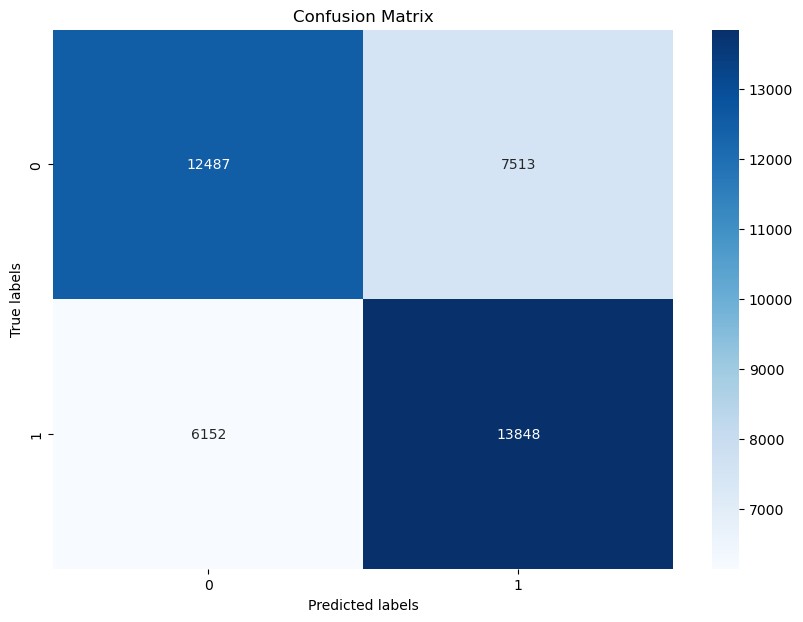

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predict labels using the test data
y_pred = model.predict(X_test)
y_pred_labels = np.where(y_pred > 0.5, 1, 0)  # This assumes a binary classification with threshold 0.5

# 2. Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# 3. Visualize the confusion matrix
plt.figure(figsize=(10,7))

# Using seaborn to visualize the matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
import time

def image_data_generator(data_folder, img_size=(224, 224), batch_size=32, color_mode='rgb'):
    datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    generator = datagen.flow_from_directory(
        data_folder,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        color_mode=color_mode
    )
    return generator

In [2]:
def ResNet50_model(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', AUC(name='auc')])
    return model

In [3]:
base_path = r'C:\Users\pc\Desktop\CNN\Correlation\0.1_threshold'
train_data_folder = os.path.join(base_path, 'Train_Image')
val_data_folder = os.path.join(base_path, 'Validation_Image')
test_data_folder = os.path.join(base_path, 'Test_Image')

# 데이터 제너레이터 생성
train_generator = image_data_generator(train_data_folder, batch_size=128)
val_generator = image_data_generator(val_data_folder, batch_size=128)
test_generator = image_data_generator(test_data_folder, batch_size=128)

# 모델 정의
# Input shape은 (None, None, None)으로 설정하여 모든 크기의 이미지를 받을 수 있게 합니다.
# 실제 이미지 크기는 제너레이터가 알아서 조절합니다.
model = ResNet50_model(input_shape=(224, 224, 3))

# 배치 크기와 에포크 설정
epochs = 10

# 모델 훈련
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# 테스트하기 전에 시간 측정 시작
start_time = time.time()

# 모델 평가
test_loss, test_accuracy, test_auc = model.evaluate(test_generator)

# 시간 측정 종료 및 결과 출력
end_time = time.time()
elapsed_time = end_time - start_time

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test AUC:", test_auc)
print(f"Test Duration: {elapsed_time:.4f} seconds")

Found 320000 images belonging to 2 classes.
Found 40000 images belonging to 2 classes.
Found 40000 images belonging to 2 classes.
Epoch 1/10
2500/2500 [==============================] - 605s 235ms/step - loss: 0.6971 - accuracy: 0.5517 - auc: 0.5731 - val_loss: 0.6814 - val_accuracy: 0.5580 - val_auc: 0.6043
Epoch 2/10
2500/2500 [==============================] - 484s 193ms/step - loss: 0.6776 - accuracy: 0.5658 - auc: 0.5957 - val_loss: 0.6793 - val_accuracy: 0.5509 - val_auc: 0.6138
Epoch 3/10
2500/2500 [==============================] - 483s 193ms/step - loss: 0.6734 - accuracy: 0.5730 - auc: 0.6066 - val_loss: 0.6674 - val_accuracy: 0.5851 - val_auc: 0.6252
Epoch 4/10
2500/2500 [==============================] - 483s 193ms/step - loss: 0.6686 - accuracy: 0.5797 - auc: 0.6170 - val_loss: 0.6669 - val_accuracy: 0.5794 - val_auc: 0.6268
Epoch 5/10
2500/2500 [==============================] - 483s 193ms/step - loss: 0.6650 - accuracy: 0.5831 - auc: 0.6230 - val_loss: 0.6678 - val_accur

In [4]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_generator, steps=len(test_generator))

# 예측된 레이블을 이진 레이블로 변환합니다.
# 이진 분류에서는 0.5를 기준으로 설정합니다.
predicted_classes = (predictions > 0.5).astype(int)

# 실제 레이블을 얻습니다.
true_classes = test_generator.classes

# 혼동 행렬 생성
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# 혼동 행렬 출력
print("Confusion Matrix:")
print(conf_matrix)

313/313 [==============================] - 53s 167ms/step
Confusion Matrix:
[[ 8480 11520]
 [ 8412 11588]]
